# BDM550 Final Project

authors: 
- Saleh Babaei 121183206
- Togashan Pirapakaran 113079164

### Fall 2022 

2022-11-30

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
import string
import re
import numpy
import spacy
import pickle

In [3]:
import gensim
from gensim.models import ldamodel
from gensim.corpora import Dictionary
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


## Preprocessing functions

**get_lemma function is saving the root of a word**

In [4]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

**prepare_text removes the stopwords and only extracts lowercased stings which contains more than 4 characters and finally tokenize the text**

In [5]:
def prepare_text(text):
    out = remove_stopwords(re.sub(r'[^\w\s]|[0-9]', ' ', text)).lower()
    out = word_tokenize(out)
    out = [i for i in out if len(i) > 4]
    out = [get_lemma(i) for i in out]
    
    return out

### Data files

In [6]:
Corpus_root = '/Users/salehbabaei/Desktop/2022/BDM 550/Final Project/corpus'
Corpus = PlaintextCorpusReader(Corpus_root, '.*csv')
corpus_raw = Corpus.raw()
corpus_raw = [p for p in corpus_raw.split('\n') if p]
corpus_raw = corpus_raw[1:]

In [7]:
len(corpus_raw)

50003

this test corpus was used to run the code faster and then has been replaced with the actual data

In [8]:
test_corpus = corpus_raw[0:1000]
len(test_corpus)

1000

## Cleaning and tokenizing text

In [9]:
tokens = [prepare_text(i) for i in corpus_raw]

## Gensim LDA

Convert to bag of words

In [10]:
dictionary = Dictionary(tokens)

corpus = [dictionary.doc2bow(text) for text in tokens]

Saving the dictionary corpus for pyLDAviz

In [11]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

### saving the model in "model"

In [12]:
numpy.random.seed(1)
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, alpha='asymmetric', minimum_probability=1e-8)

### LDA model topics 

In [13]:
model.save('lda20.gensim')
topics = model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.031*"police" + 0.017*"officer" + 0.009*"report" + 0.007*"accord"')
(1, '0.194*"trump" + 0.015*"event" + 0.013*"donald" + 0.011*"campaign"')
(2, '0.017*"attack" + 0.016*"saudi" + 0.014*"macri" + 0.012*"group"')
(3, '0.036*"family" + 0.025*"father" + 0.022*"child" + 0.017*"duterte"')
(4, '0.074*"trump" + 0.020*"president" + 0.018*"republican" + 0.017*"house"')
(5, '0.025*"business" + 0.019*"company" + 0.015*"property" + 0.012*"hotel"')
(6, '0.029*"trump" + 0.024*"federal" + 0.018*"administration" + 0.017*"immigration"')
(7, '0.028*"trump" + 0.022*"election" + 0.021*"percent" + 0.015*"voter"')
(8, '0.035*"state" + 0.019*"carolina" + 0.017*"georgia" + 0.016*"county"')
(9, '0.028*"star" + 0.006*"people" + 0.006*"years" + 0.005*"world"')
(10, '0.018*"olympic" + 0.017*"sport" + 0.015*"second" + 0.014*"athlete"')
(11, '0.037*"erdogan" + 0.017*"country" + 0.017*"conflict" + 0.013*"president"')
(12, '0.034*"scotland" + 0.018*"scottish" + 0.018*"farage" + 0.017*"british"')
(13, '0.026*"cou

or we can just use show_topics() which is a little less organized

In [14]:
model.show_topics()

[(19,
  '0.041*"milky" + 0.013*"scientist" + 0.012*"study" + 0.012*"astronomer" + 0.012*"gravitational" + 0.009*"health" + 0.009*"gravity" + 0.008*"case" + 0.008*"discover" + 0.007*"particularly"'),
 (18,
  '0.083*"college" + 0.075*"school" + 0.070*"student" + 0.027*"education" + 0.022*"researcher" + 0.021*"university" + 0.020*"community" + 0.012*"program" + 0.012*"study" + 0.011*"paper"'),
 (17,
  '0.041*"store" + 0.039*"woman" + 0.021*"abortion" + 0.017*"plan" + 0.013*"business" + 0.013*"retailer" + 0.013*"starbucks" + 0.011*"customer" + 0.011*"sear" + 0.011*"christie"'),
 (16,
  '0.095*"trump" + 0.017*"president" + 0.016*"election" + 0.014*"contents" + 0.012*"campaign" + 0.009*"office" + 0.007*"state" + 0.007*"official" + 0.007*"question" + 0.007*"organization"'),
 (15,
  '0.117*"galaxy" + 0.031*"cloud" + 0.021*"apple" + 0.019*"steal" + 0.015*"google" + 0.010*"inside" + 0.010*"theft" + 0.009*"system" + 0.008*"insider" + 0.008*"thief"'),
 (4,
  '0.074*"trump" + 0.020*"president" + 0.

## Document and word -topic distibution

In [15]:
all_topics = model.get_document_topics(corpus, per_word_topics=True)

In [16]:
len(all_topics)

50003

In [17]:
#doc_topics
all_topics[0][0]

[(0, 0.00031908893),
 (1, 0.00026039808),
 (2, 0.00022012864),
 (3, 0.00019066279),
 (4, 0.4284774),
 (5, 0.00015040423),
 (6, 0.24472176),
 (7, 0.022825394),
 (8, 0.000114226525),
 (9, 0.03229247),
 (10, 9.84408e-05),
 (11, 9.207836e-05),
 (12, 8.64884e-05),
 (13, 0.24416907),
 (14, 7.71242e-05),
 (15, 7.316345e-05),
 (16, 6.9589645e-05),
 (17, 6.634872e-05),
 (18, 6.339623e-05),
 (19, 0.025632331)]

In [18]:
with open("doc_topics.txt", "a") as f:
    for i in all_topics:
        f.write(str(i[0]))

In [19]:
#word_topics
all_topics[0][1]

[(0, [4, 19, 9, 7, 6, 13, 0, 1, 2]),
 (1, [6, 13, 4, 19, 7, 9, 0]),
 (2, [6, 13, 4, 7, 9, 19, 0, 1]),
 (3, [6, 4, 13, 19, 7, 9, 0, 1]),
 (4, [6, 13, 4, 7, 19, 9, 0, 1]),
 (5, [4, 6, 19, 7, 13, 9]),
 (6, [4, 6, 13, 7, 19, 9, 0, 2, 1]),
 (7, [4, 6, 13, 7, 9, 19, 0, 1, 2]),
 (8, [4, 13, 7, 6, 9, 19, 0, 1, 2, 3]),
 (9, [6, 4, 13, 9, 7, 19, 0, 1]),
 (10, [4, 13, 6, 9, 7, 19, 0, 1, 2]),
 (11, [13, 4, 6, 7, 9, 19, 1, 0]),
 (12, [13, 4, 6, 19, 9, 7, 0, 1]),
 (13, [4, 6, 13, 9, 19]),
 (14, [4, 6, 13, 7, 19, 9, 0]),
 (15, [6, 4, 13, 9, 19, 7, 1, 0]),
 (16, [13, 6, 4, 7, 19, 9, 1]),
 (17, [13, 6, 4, 7, 19, 9, 0]),
 (18, [4, 13, 6, 19, 7, 9, 0, 1]),
 (19, [9, 4, 13, 6, 19, 1, 7]),
 (20, [4, 13, 6, 7, 9, 19, 1, 0]),
 (21, [13, 4, 6, 9, 7, 19, 0, 1]),
 (22, [6, 4, 19, 7, 9, 13, 0]),
 (23, [6]),
 (24, [4, 6]),
 (25, [13, 4, 6, 9, 19, 7, 0, 2]),
 (26, [6, 13, 4, 7, 9, 19, 0, 1]),
 (27, [4, 13, 6, 7, 9, 0, 19]),
 (28, [9, 19, 6, 0, 3]),
 (29, [13, 4, 19, 6, 9, 7, 0, 1, 2]),
 (30, [6, 4, 13, 7, 9, 19, 0

In [20]:
with open("word_topics.txt", "a") as f:
    for i in all_topics:
        f.write(str(i[1]))

In [21]:
#phi_values
all_topics[0][2]

[(0,
  [(0, 1.09676575e-05),
   (1, 2.7948516e-07),
   (2, 1.1724743e-07),
   (4, 0.28194788),
   (6, 0.091649994),
   (7, 0.11733456),
   (9, 0.14342055),
   (13, 0.08364212),
   (19, 0.2754991)]),
 (1,
  [(0, 9.031757e-08),
   (4, 0.024162255),
   (6, 0.89552027),
   (7, 0.0069546006),
   (9, 0.0016187057),
   (13, 0.062186625),
   (19, 0.009446009)]),
 (2,
  [(0, 9.520437e-08),
   (1, 5.2657434e-08),
   (4, 0.18742093),
   (6, 0.5670459),
   (7, 0.016074857),
   (9, 0.006876088),
   (13, 0.21808179),
   (19, 0.0043035075)]),
 (3,
  [(0, 1.2484671e-07),
   (1, 1.3408365e-08),
   (4, 3.0841777),
   (6, 9.376802),
   (7, 0.004746587),
   (9, 8.772987e-05),
   (13, 0.5266226),
   (19, 0.0073117204)]),
 (4,
  [(0, 3.630079e-08),
   (1, 1.6053933e-08),
   (4, 0.2680129),
   (6, 0.428528),
   (7, 0.005459983),
   (9, 0.0007781119),
   (13, 0.29460582),
   (19, 0.0024125904)]),
 (5,
  [(4, 0.6965533),
   (6, 0.2963772),
   (7, 0.0015950281),
   (9, 0.0006246361),
   (13, 0.0010179441),
   (

#  PyLDAvis 

In [23]:
dictionary = Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('lda20.gensim')

In [24]:
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/salehbabae

/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distuti

# Part 2

##  Most Popular Topic

In [35]:
topT = model.top_topics(corpus=corpus, dictionary=dictionary, window_size=None, coherence='u_mass', topn=1, processes=-1)

In [36]:
topT

[([(0.031441618, 'police')], nan),
 ([(0.19401155, 'trump')], nan),
 ([(0.017354203, 'attack')], nan),
 ([(0.036248337, 'family')], nan),
 ([(0.07352541, 'trump')], nan),
 ([(0.025163991, 'business')], nan),
 ([(0.028780963, 'trump')], nan),
 ([(0.027820995, 'trump')], nan),
 ([(0.034791782, 'state')], nan),
 ([(0.02837481, 'star')], nan),
 ([(0.017936392, 'olympic')], nan),
 ([(0.03741637, 'erdogan')], nan),
 ([(0.03445759, 'scotland')], nan),
 ([(0.026187295, 'court')], nan),
 ([(0.03227711, 'facebook')], nan),
 ([(0.11717546, 'galaxy')], nan),
 ([(0.094949305, 'trump')], nan),
 ([(0.041258432, 'store')], nan),
 ([(0.083130956, 'college')], nan),
 ([(0.040758085, 'milky')], nan)]

In [242]:
d = {}
for i in topT:
    if str(i[0][0][1]) not in d:
        d[str(i[0][0][1])] = round(i[0][0][0] *len(corpus))
    else:
        d[str(i[0][0][1])] += round(i[0][0][0]* len(corpus))
dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

{'trump': 11254,
 'galaxy': 5859,
 'college': 4157,
 'store': 2063,
 'milky': 2038,
 'erdogan': 1871,
 'family': 1813,
 'state': 1740,
 'scotland': 1723,
 'facebook': 1614,
 'police': 1572,
 'star': 1419,
 'court': 1309,
 'business': 1258,
 'olympic': 897}

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [202]:
x = list(d.keys())[:4]
y = list(d.values())[:4]

In [206]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

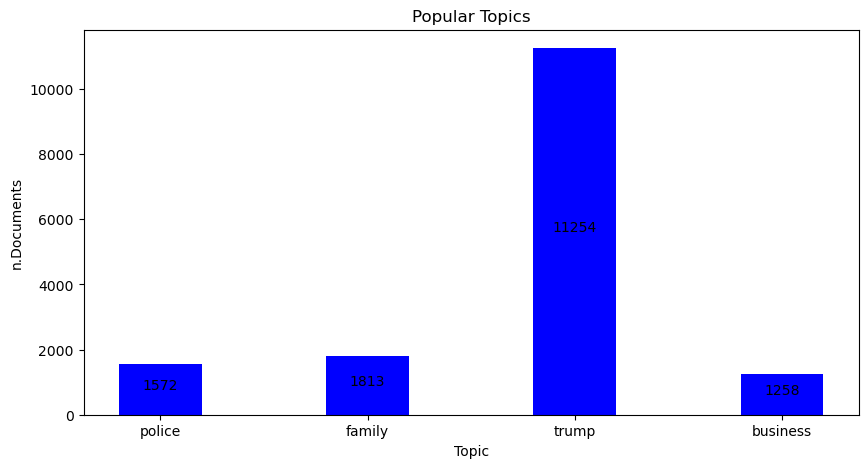

In [207]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color ='blue',
        width = 0.4)
addlabels(x, y)
plt.title("Popular Topics")
plt.xlabel("Topic")
plt.ylabel("n.Documents")
plt.show()

## Popularity Trend

In [521]:
docTop = [list(list(zip(*model.get_document_topics(i)))[1]) for i in corpus]

In [522]:
dates = [re.findall("\d{4}[/-]\d{2}[/-]\d{2}",i) for i in corpus_raw]
dates = [i[0] if len(i)>0 else '' for i in dates ]

<>:1: DeprecationWarning:

invalid escape sequence \d

<>:1: DeprecationWarning:

invalid escape sequence \d

/var/folders/sg/07yql_0n00vfn3gr8mgypndm0000gn/T/ipykernel_2085/633135701.py:1: DeprecationWarning:

invalid escape sequence \d



In [523]:
topics_df = pd.DataFrame(docTop)[[0,3,5,15]].rename(columns = {0:'Police',3:'Family', 5:'Business', 15:'Galaxy'})
topics_df['dates'] = dates
topics_df

,Police,Family,Business,Galaxy,dates
0,0.000319,0.000191,0.000150,0.000073,2016-12-31
1,0.725556,0.029769,0.000034,0.000017,2017-06-19
2,0.081529,0.071733,0.061759,0.000035,2017-01-06
3,0.038085,0.026381,0.000076,0.007081,2017-04-10
4,0.000409,0.000244,0.000193,0.000094,2017-01-02
...,...,...,...,...,...
49998,0.061341,0.000183,0.266262,0.000070,2017-01-11
49999,0.046766,0.000203,0.000160,0.000078,2017-01-11
50000,0.000031,0.038156,0.332564,0.000007,2017-01-11
50001,0.000270,0.000162,0.055896,0.000062,2017-01-11


In [524]:
topics_df['month'] = pd.to_datetime(topics_df['dates']).dt.strftime('%Y-%m')

In [525]:
topics_df = topics_df[(topics_df['month'] > '2016-01-01') & (topics_df['month'] < '2018-01-01')]

In [526]:
topics_df

,Police,Family,Business,Galaxy,dates,month
0,0.000319,0.000191,0.000150,0.000073,2016-12-31,2016-12
1,0.725556,0.029769,0.000034,0.000017,2017-06-19,2017-06
2,0.081529,0.071733,0.061759,0.000035,2017-01-06,2017-01
3,0.038085,0.026381,0.000076,0.007081,2017-04-10,2017-04
4,0.000409,0.000244,0.000193,0.000094,2017-01-02,2017-01
...,...,...,...,...,...,...
49998,0.061341,0.000183,0.266262,0.000070,2017-01-11,2017-01
49999,0.046766,0.000203,0.000160,0.000078,2017-01-11,2017-01
50000,0.000031,0.038156,0.332564,0.000007,2017-01-11,2017-01
50001,0.000270,0.000162,0.055896,0.000062,2017-01-11,2017-01


In [527]:
topics_df = topics_df.groupby('month').sum()

In [528]:
topics_df

,Police,Family,Business,Galaxy
month,,,,
2016-02,135.067810,47.423782,87.223877,36.649300
2016-03,179.348297,62.480404,82.660263,44.449993
2016-04,227.845642,46.146011,118.347107,40.438007
2016-05,177.720184,52.135872,107.209312,50.065666
2016-06,279.748016,130.849319,124.674118,53.465858
2016-07,429.300079,82.695229,109.999512,51.851887
2016-08,389.504272,96.246765,132.468521,62.154766
2016-09,374.631500,98.558716,114.215500,73.818123
2016-10,257.577423,83.197533,97.943367,63.610821


Text(0, 0.5, 'Topic Evolution')

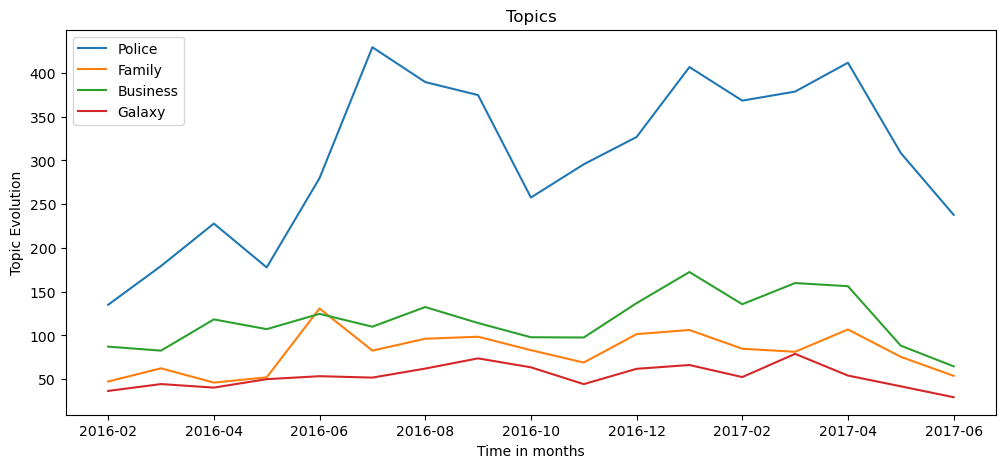

In [529]:
topics_df.plot(grid= False, figsize=(12, 5))
plt.title("Topics")
plt.xlabel("Time in months")
plt.ylabel("Topic Evolution")

## Silhouette Score

**Silhouette Score = (b-a)/max(a,b)**

In [533]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [562]:
ss_df = pd.DataFrame(docTop)

In [563]:
ss_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000319,0.000260,0.000220,0.000191,0.428483,0.000150,0.244723,0.022815,0.000114,0.032295,0.000098,0.000092,0.000086,0.244170,0.000077,0.000073,0.000070,0.000066,0.000063,0.025634
1,0.725556,0.000060,0.000050,0.029769,0.000039,0.000034,0.000031,0.088808,0.000026,0.091979,0.000023,0.000021,0.000020,0.019575,0.000018,0.000017,0.000016,0.000015,0.011128,0.032816
2,0.081529,0.000124,0.008511,0.071733,0.000080,0.061759,0.042303,0.000059,0.000054,0.601031,0.018108,0.000044,0.000041,0.015227,0.044870,0.000035,0.000033,0.000032,0.054398,0.000029
3,0.038085,0.000132,0.000112,0.026381,0.008167,0.000076,0.007225,0.005451,0.012114,0.774766,0.021186,0.033332,0.006492,0.028788,0.000039,0.007081,0.003501,0.000034,0.008225,0.018812
4,0.000409,0.048131,0.000282,0.000244,0.000216,0.000193,0.000174,0.000159,0.000146,0.045729,0.000126,0.880088,0.000111,0.002759,0.000099,0.000094,0.000089,0.000085,0.000081,0.020783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49998,0.061341,0.000250,0.000211,0.000183,0.340813,0.266262,0.000130,0.015243,0.000109,0.115423,0.000094,0.149354,0.000083,0.024660,0.000074,0.000070,0.000067,0.000064,0.000061,0.025508
49999,0.046766,0.000277,0.012390,0.000203,0.000179,0.000160,0.000145,0.000132,0.000121,0.122487,0.000105,0.000098,0.017895,0.000087,0.022956,0.000078,0.694535,0.000071,0.000067,0.081250
50000,0.000031,0.089836,0.007018,0.038156,0.009145,0.332564,0.063034,0.002187,0.000011,0.000678,0.000010,0.083125,0.012226,0.033311,0.000008,0.000007,0.328636,0.000006,0.000006,0.000006
50001,0.000270,0.000221,0.000187,0.000162,0.000143,0.055896,0.185396,0.000105,0.000097,0.000090,0.000084,0.000078,0.000073,0.000069,0.000065,0.000062,0.000059,0.000056,0.756835,0.000051


/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='1', ylabel='10'>

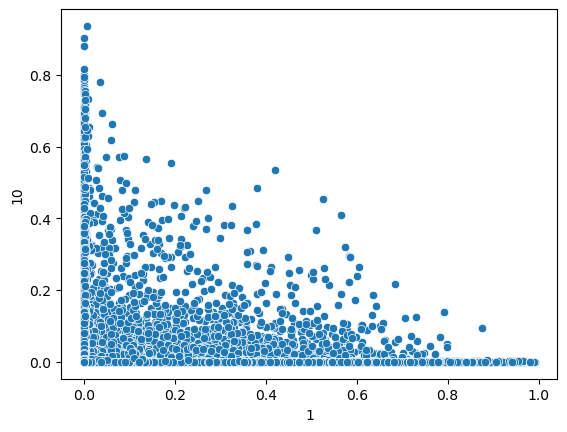

In [564]:
sns.scatterplot(ss_df[1],ss_df[10])

In [565]:
KMean= KMeans(n_clusters=20)
KMean.fit(ss_df)
label=KMean.predict(ss_df)

In [566]:
print(f'Silhouette Score(n=2): {silhouette_score(ss_df, label)}')

Silhouette Score(n=2): 0.25850367546081543


We can say that the clusters are not well apart from each other.

as the silhouette score is closer to 1 the better the clusting is done

/Users/salehbabaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='0', ylabel='1'>

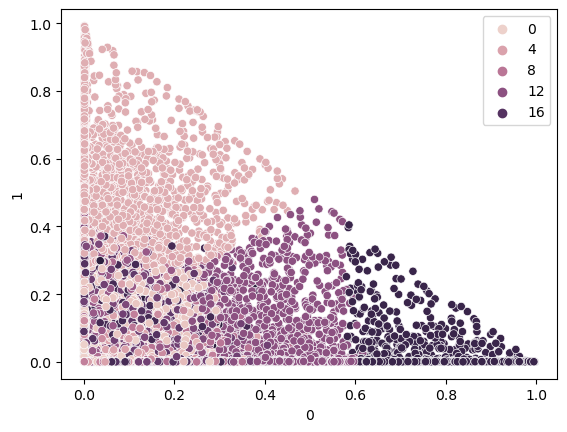

In [567]:
sns.scatterplot(ss_df[0],ss_df[1],hue=label)